In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Task 1: Implementing a Logistic Regression Model

Firstly, the need would be to define the Activation Function. I'm going to use the Sigmoid function, as it is the most common activation function for binary classification.

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Along with the Sigmoid function, we need to define the Cost Function. I'm going to use the Binary Cross-Entropy function, as discussed in the lectures.

In [3]:
def binary_cross_entropy(y_true, y_pred):
    if isinstance(y_pred, np.ndarray):      # Need to ensure y_pred is scalar (training loop crashes without)
        y_pred = y_pred.flatten()[0]
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

Now is the time to actually implement the Logistic Regression model. I'm using the pseudo-code provided in the lectures as a guide. To note, I could've implemented the forward propagation step as a separate function, but I didn't see the need for it for this task.

In [4]:
def logistic_regression(X, y, learning_rate=0.01, batch_size=100, threshold=0.5, max_iter=1000):

    # Initialize weights and bias
    w = np.zeros(X.shape[1])
    b = 0

    # Training loop variables
    stopping = False
    J_running = 0
    J_running_prev = 0
    iteration = 0

    while not stopping:
        # Select single random example (stochastic gradient descent)
        idx = np.random.choice(len(y))
        xi = X[idx]
        yi = y[idx]

        z = np.dot(w, xi) + b
        y_hat = sigmoid(z)

        # Compute loss

        J_current = binary_cross_entropy(yi, y_hat)

        # Gradient descent stage

        dw = (y_hat - yi) * xi
        db = y_hat - yi

        w -= learning_rate * dw
        b -= learning_rate * db

        # Update iteration counter and running loss

        iteration += 1
        J_running += J_current

        # Check stopping criteria

        if iteration > max_iter:
            stopping = True                     # Failed to converge

        if (iteration % batch_size) == 0:
            if np.abs(J_running - J_running_prev) < threshold:
                stopping = True
            J_running_prev = J_running
            J_running = 0

    return w, b

Now since the model is defined, we need to define a prediction function. No use having a model if we can't make predictions with it.

In [5]:
def predict(X, w, b, threshold=0.5):
    z = np.dot(X, w) + b
    y_pred_prob = sigmoid(z)
    y_pred = (y_pred_prob >= threshold).astype(int)
    return y_pred, y_pred_prob

And for evaluating the model, we need an accuracy function.

In [6]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Loading the Dataset (Code copied and pasted from Load-Small-Datasets.ipynb)

In [7]:
# Use pandas to read the CSV file as a dataframe
df1 = pd.read_csv("blobs600.csv")

# The y values are those labelled 'Class': extract their values
y1 = df1['Class'].values

# The x values are all other columns
del df1['Class']   # drop the 'Class' column from the dataframe
X1 = df1.values     # convert the remaining columns to a numpy array

In [8]:
print(f"The dimensions of the dataset are: {np.shape(X1)}")

The dimensions of the dataset are: (600, 3)


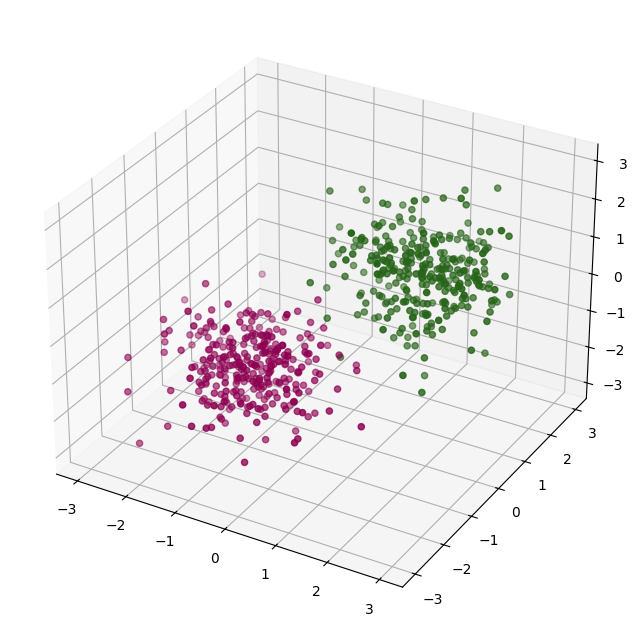

In [9]:
# Plot the dataset in 3D, with colours according to the class label

fig = plt.figure(figsize=(8, 8)) # set the size to 8x8
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X1[:,0], X1[:,1], X1[:,2], c=y1, cmap="PiYG") # changed the colour map because why not

plt.show()
plt.close(fig)

In [10]:
# Use pandas to read the CSV file as a dataframe
df2 = pd.read_csv("circles500.csv")

# The y values are those labelled 'Class': extract their values
y2 = df2['Class'].values

# The x values are all other columns
del df2['Class']   # drop the 'Class' column from the dataframe
X2 = df2.values     # convert the remaining columns to a numpy array

In [11]:
# Check its dimensions

print(f"The dimensions of Dataset 2 are: {np.shape(X2)}")

The dimensions of Dataset 2 are: (500, 2)


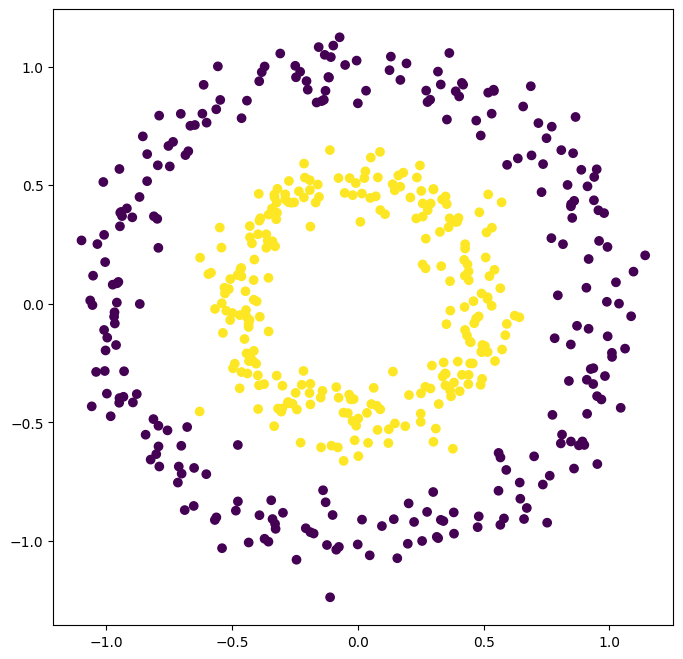

In [12]:
# plot X[0] vs X[1] and colour points according to the class, y

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(X2[:,0], X2[:,1], c=y2)

plt.show()
plt.close(fig)

In [13]:
# Some examples of working with the data, to look at rows/columns
print ("len(X2):", len(X2))            # outer array: one per sample
print ("len(X2[0]):", len(X2[0]))      # each inner array is the attributes of one sample
print ("len(X2[:,0]):", len(X2[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X2)
print ("X2: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y2)", len(y2))
print ("np.shape(y2):", np.shape(y2))

# You can transpose the y data using 'reshape'
yt = np.reshape(y2, (len(y2),1))
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y2 transpose: nsamples =", nsamples, ", nattribs =", nattribs)

len(X2): 500
len(X2[0]): 2
len(X2[:,0]): 500
X2: nsamples = 500 , nattribs = 2
len(y2) 500
np.shape(y2): (500,)
np.shape(yt): (500, 1)
y2 transpose: nsamples = 500 , nattribs = 1


# Task 2: Training and Evaluation

I didn't want to use the scikit-learn implementation of train_test_split. Not only is it too "out-of-the-box", it lacks the ability to get a validation split (obviously it could be done by simply calling the function twice, but I wanted to do it in one go). So I just used numpy.split. I did look at some approaches from here: https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn

In [14]:
np.random.seed(42)
indices = np.random.permutation(len(X1))
X1_shuffled = X1[indices]
y1_shuffled = y1[indices]

In [15]:
# Train, Validation, Test split

X1_train, X1_val, X1_test = np.split(X1_shuffled, [int(.7*len(X1)), int(.85*len(X1))])
y1_train, y1_val, y1_test = np.split(y1_shuffled, [int(.7*len(y1)), int(.85*len(y1))])

In [16]:
# Model Training

w1, b1 = logistic_regression(X1_train, y1_train)

In [17]:
y1_pred, y1_pred_prob = predict(X1_val, w1, b1)
print(f"Accuracy on Dataset 1: {accuracy(y1_val, y1_pred)}")

Accuracy on Dataset 1: 1.0


In [18]:
y1_pred_test, y1_pred_prob_test = predict(X1_test, w1, b1)
y1_pred_train, _ = predict(X1_train, w1, b1)
y1_pred_val, _ = predict(X1_val, w1, b1)

print(f"\nDataset 1 (Blobs) - Logistic Regression Results:")
print(f"  Training Accuracy:   {accuracy(y1_train, y1_pred_train):.4f}")
print(f"  Validation Accuracy: {accuracy(y1_val, y1_pred_val):.4f}")
print(f"  Test Accuracy:       {accuracy(y1_test, y1_pred_test):.4f}")


Dataset 1 (Blobs) - Logistic Regression Results:
  Training Accuracy:   0.9952
  Validation Accuracy: 1.0000
  Test Accuracy:       1.0000


Clearly, as mentioned in the assignment itself, blobs would be linearly separable and it is clear it is and the accuracy is 1.0 (or 100%), without any hyperparameter tuning.

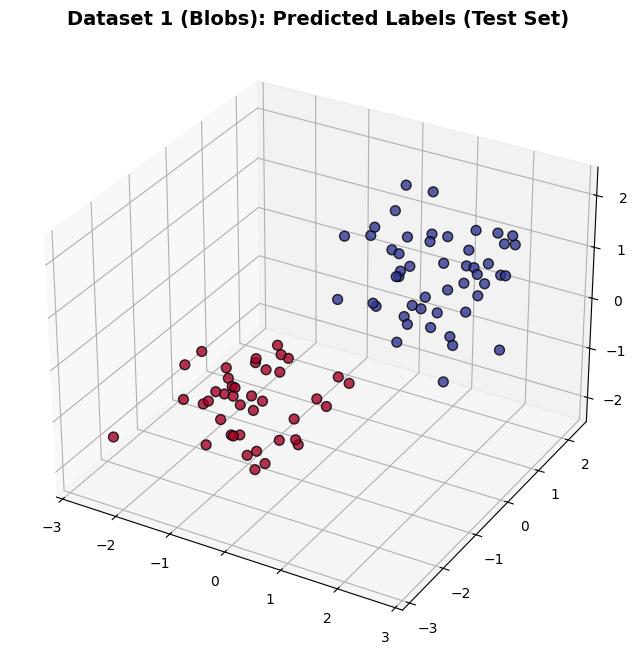

In [19]:
# Visualize Dataset 1 (Blobs - 3D) Classification Results
fig = plt.figure(figsize=(28, 8))

ax = fig.add_subplot(132, projection='3d')
scatter = ax.scatter(X1_test[:, 0], X1_test[:, 1], X1_test[:, 2],
                       c=y1_pred_test, cmap='RdYlBu', edgecolors='k', s=50, alpha=0.8)
ax.set_title('Dataset 1 (Blobs): Predicted Labels (Test Set)', fontsize=14, fontweight='bold')
plt.show()
plt.close(fig)

In [20]:
# Same process for Dataset 2 (Circles)

np.random.seed(42)
indices = np.random.permutation(len(X2))
X2_shuffled = X2[indices]
y2_shuffled = y2[indices]

In [21]:
X2_train, X2_val, X2_test = np.split(X2_shuffled, [int(.7*len(X2)), int(.85*len(X2))])
y2_train, y2_val, y2_test = np.split(y2_shuffled, [int(.7*len(y2)), int(.85*len(y2))])

In [22]:
w2, b2 = logistic_regression(X2_train, y2_train)

In [23]:
y2_pred_test, y2_pred_prob_test = predict(X2_test, w2, b2)
y2_pred_train, _ = predict(X2_train, w2, b2)
y2_pred_val, _ = predict(X2_val, w2, b2)

print(f"\nDataset 2 (Circles) - Logistic Regression Results:")
print(f"  Training Accuracy:   {accuracy(y2_train, y2_pred_train):.4f}")
print(f"  Validation Accuracy: {accuracy(y2_val, y2_pred_val):.4f}")
print(f"  Test Accuracy:       {accuracy(y2_test, y2_pred_test):.4f}")


Dataset 2 (Circles) - Logistic Regression Results:
  Training Accuracy:   0.5200
  Validation Accuracy: 0.5067
  Test Accuracy:       0.4267


Dataset 2, however, is performing pretty poorly (42% on test!). Though it has 3 classes, it isn't a complete disaster. Something below 33% would've been a coin flip. The figure depicts accurately what is actually happening.

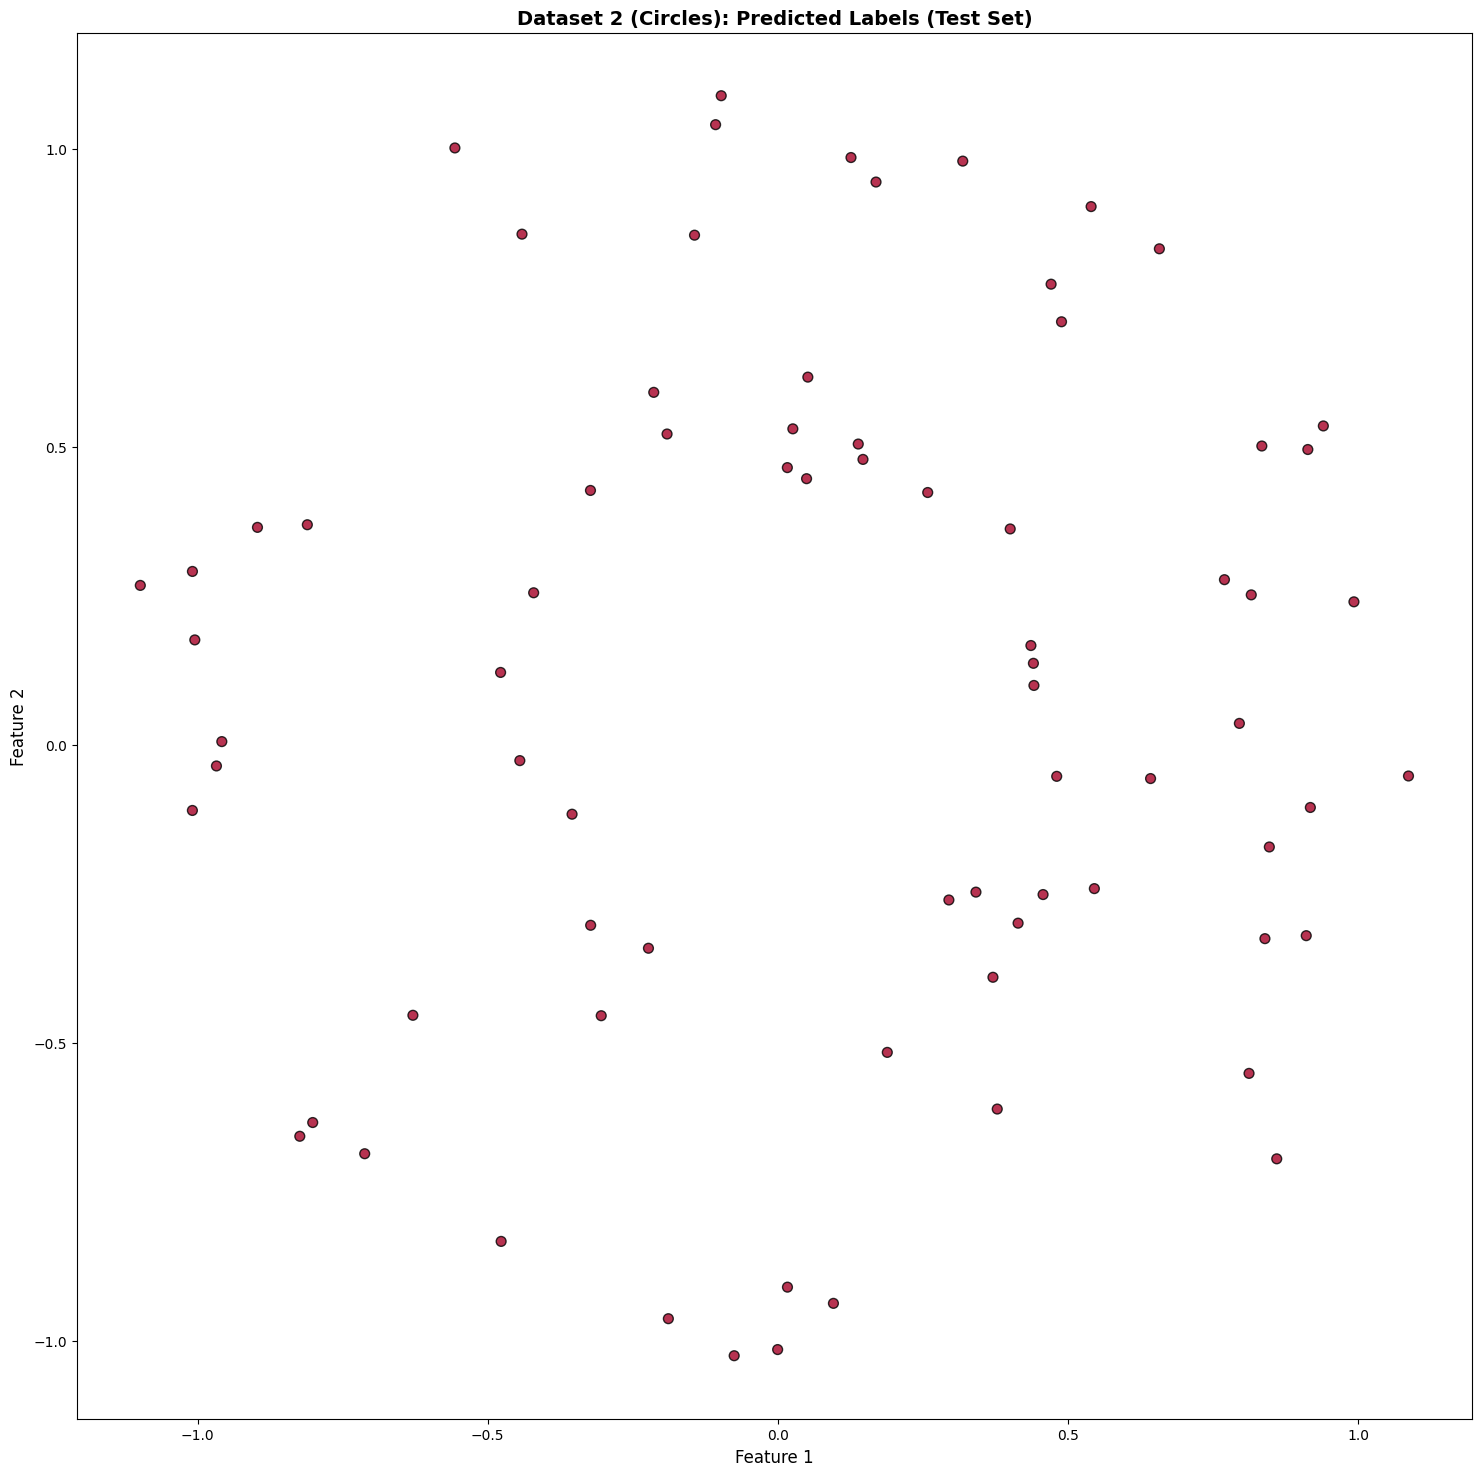

In [24]:
# Visualize Dataset 2 (Circles - 2D) Classification Results
fig, axes = plt.subplots(figsize=(18, 18))

axes.scatter(X2_test[:, 0], X2_test[:, 1], c=y2_pred_test, cmap='RdYlBu', edgecolors='k', s=50, alpha=0.8)
axes.set_title('Dataset 2 (Circles): Predicted Labels (Test Set)', fontsize=14, fontweight='bold')
axes.set_xlabel('Feature 1', fontsize=12)
axes.set_ylabel('Feature 2', fontsize=12)

plt.show()
plt.close(fig)

This figure clearly shows the issue. All datapoints are being classified into the same class. So it is overfitting?

# Task 3: Implementing a Shallow Neural Network

Again, using the lecture notes as a guide, the first step would be to initialize the parameters. Needed to take care of the dimensions.

In [25]:
def initialize_parameters(n_input, n_hidden_nodes):
    np.random.seed(42)
    W1 = np.random.randn(n_hidden_nodes, n_input) * 0.01
    b1 = np.zeros((n_hidden_nodes, 1))
    W2 = np.random.randn(1, n_hidden_nodes) * 0.01
    b2 = np.zeros((1, 1))

    return W1, b1, W2, b2

Then came the forward propagation step. This is where we add the hidden layer as well as the output layer. I used the same sigmoid activation function as in the logistic regression model. Some people suggested using tanh, but I couldn't see the reason.

In [26]:
def forward_propagation(x, W1, b1, W2, b2):
    x = x.reshape(-1, 1)
    # Hidden layer
    z1 = np.dot(W1, x) + b1
    a1 = sigmoid(z1)

    # Output layer
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)

    return z1, a1, z2, a2

The backward propagation step is where the gradients are calculated. This is where the chain rule comes into play, hence, the sigmoid derivative in the hidden layer gradient calculation.

In [27]:
def backward_propagation(x, y, a1, a2, W2):
    x = x.reshape(-1, 1)
    # Output layer gradients
    dz2 = a2 - y
    dW2 = np.dot(dz2, a1.T)
    db2 = dz2

    # Hidden layer gradients
    dz1 = np.dot(W2.T, dz2) * a1 * (1 - a1)  # sigmoid-derivative (a1*(1-a1))
    dW1 = np.dot(dz1, x.T)
    db1 = dz1

    return dW1, db1, dW2, db2

In [28]:
def shallow_neural_network(X, y, X_val, y_val, n_hidden_nodes=4, learning_rate=0.01, batch_size=100, threshold=1e-4, max_iter=10000):

    n_samples, n_input = X.shape

    # Initialize parameters
    W1, b1, W2, b2 = initialize_parameters(n_input, n_hidden_nodes)

    # Training loop variables
    stopping = False
    J_running = 0
    J_running_prev = 0
    iteration = 0

    # Tracking variables
    train_losses = []
    val_accuracies = []
    iterations_tracked = []

    while not stopping:
        # Select single random example (stochastic gradient descent)
        idx = np.random.choice(n_samples)
        xi = X[idx]
        yi = y[idx]

        # Forward propagation
        z1, a1, z2, a2 = forward_propagation(xi, W1, b1, W2, b2)

        # Compute loss
        J_current = binary_cross_entropy(yi, a2)

        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(xi, yi, a1, a2, W2)

        # Update parameters
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        # Update iteration counter and running loss
        iteration += 1
        J_running += J_current

        # Track progress at regular intervals
        if iteration % 100 == 0:
            # Evaluate on validation set
            y_val_pred, _ = predict_nn(X_val, W1, b1, W2, b2)
            val_acc = accuracy(y_val, y_val_pred)

            avg_loss = J_running / 100
            train_losses.append(avg_loss)
            val_accuracies.append(val_acc)
            iterations_tracked.append(iteration)

            print(f"Iteration {iteration}: Avg Loss = {avg_loss:.4f}, Val Accuracy = {val_acc:.4f}")

        # Check stopping criteria
        if iteration > max_iter:
            stopping = True
            print(f"Stopped: Max iterations ({max_iter}) reached")

        # Check convergence every batch_size iterations
        if (iteration % batch_size) == 0:
            if np.abs(J_running - J_running_prev) < threshold:
                stopping = True
                print(f"Converged at iteration {iteration}")
            J_running_prev = J_running
            J_running = 0

    return W1, b1, W2, b2, train_losses, val_accuracies, iterations_tracked

As you can see above, most of the code remains the same as the model before. Key differences would be the forward and backward propagation step along with the addition of the hidden layer and its hidden nodes. Prominently, I added the code snippet from task 4, which required us to plot the training curve into the neural network function. This way I can use it for Task 3 as well as Task 4's fine tuning.

In [29]:
# Prediction function for the shallow neural network

def predict_nn(X, W1, b1, W2, b2, threshold=0.5):
    n_samples = X.shape[0]
    y_pred_prob = np.zeros(n_samples)

    # Forward propagation for each sample
    for i in range(n_samples):
        _, _, _, a2 = forward_propagation(X[i], W1, b1, W2, b2)
        y_pred_prob[i] = a2.flatten()[0]

    y_pred = (y_pred_prob >= threshold).astype(int)

    return y_pred, y_pred_prob

# Testing the Shallow Neural Network


In [30]:
W1_d1, b1_d1, W2_d1, b2_d1, _, _, _ = shallow_neural_network(X1_train, y1_train, X1_val, y1_val)

y1_train_pred_nn, _ = predict_nn(X1_train, W1_d1, b1_d1, W2_d1, b2_d1)
y1_val_pred_nn, _ = predict_nn(X1_val, W1_d1, b1_d1, W2_d1, b2_d1)
y1_test_pred_nn, _ = predict_nn(X1_test, W1_d1, b1_d1, W2_d1, b2_d1)

print(f"Training Accuracy: {accuracy(y1_train, y1_train_pred_nn):.4f}")
print(f"Validation Accuracy: {accuracy(y1_val, y1_val_pred_nn):.4f}")
print(f"Test Accuracy: {accuracy(y1_test, y1_test_pred_nn):.4f}")

Iteration 100: Avg Loss = 0.6954, Val Accuracy = 0.4889
Iteration 200: Avg Loss = 0.6958, Val Accuracy = 0.5111
Iteration 300: Avg Loss = 0.6954, Val Accuracy = 0.4889
Iteration 400: Avg Loss = 0.6929, Val Accuracy = 0.5111
Iteration 500: Avg Loss = 0.6971, Val Accuracy = 0.4889
Iteration 600: Avg Loss = 0.6919, Val Accuracy = 0.4889
Iteration 700: Avg Loss = 0.6875, Val Accuracy = 0.4889
Iteration 800: Avg Loss = 0.6979, Val Accuracy = 0.4889
Iteration 900: Avg Loss = 0.6931, Val Accuracy = 0.5111
Iteration 1000: Avg Loss = 0.6956, Val Accuracy = 0.5111
Iteration 1100: Avg Loss = 0.6939, Val Accuracy = 0.4889
Iteration 1200: Avg Loss = 0.6907, Val Accuracy = 0.5111
Iteration 1300: Avg Loss = 0.6877, Val Accuracy = 0.4889
Iteration 1400: Avg Loss = 0.6848, Val Accuracy = 0.4889
Iteration 1500: Avg Loss = 0.6788, Val Accuracy = 0.4889
Iteration 1600: Avg Loss = 0.6713, Val Accuracy = 0.6111
Iteration 1700: Avg Loss = 0.6601, Val Accuracy = 0.8222
Iteration 1800: Avg Loss = 0.6424, Val A

Clearly, no major improvement over the classical logistic regression model. This is expected, as the dataset is linearly separable.

In [31]:
W1_d2, b1_d2, W2_d2, b2_d2, _, _, _ = shallow_neural_network(
    X2_train, y2_train, X2_val, y2_val,
    n_hidden_nodes=10,
    learning_rate=0.1,
    batch_size=100,
    threshold=1e-4,
    max_iter=35000
)

y2_train_pred_nn, _ = predict_nn(X2_train, W1_d2, b1_d2, W2_d2, b2_d2)
y2_val_pred_nn, _ = predict_nn(X2_val, W1_d2, b1_d2, W2_d2, b2_d2)
y2_test_pred_nn, _ = predict_nn(X2_test, W1_d2, b1_d2, W2_d2, b2_d2)

print(f"Training Accuracy: {accuracy(y2_train, y2_train_pred_nn):.4f}")
print(f"Validation Accuracy: {accuracy(y2_val, y2_val_pred_nn):.4f}")
print(f"Test Accuracy: {accuracy(y2_test, y2_test_pred_nn):.4f}")

Iteration 100: Avg Loss = 0.7191, Val Accuracy = 0.5067
Iteration 200: Avg Loss = 0.7190, Val Accuracy = 0.5067
Iteration 300: Avg Loss = 0.7271, Val Accuracy = 0.5067
Iteration 400: Avg Loss = 0.7223, Val Accuracy = 0.5067
Iteration 500: Avg Loss = 0.7357, Val Accuracy = 0.5067
Iteration 600: Avg Loss = 0.7103, Val Accuracy = 0.5067
Iteration 700: Avg Loss = 0.7283, Val Accuracy = 0.4933
Iteration 800: Avg Loss = 0.7150, Val Accuracy = 0.4933
Iteration 900: Avg Loss = 0.7107, Val Accuracy = 0.5067
Iteration 1000: Avg Loss = 0.7125, Val Accuracy = 0.5067
Iteration 1100: Avg Loss = 0.7108, Val Accuracy = 0.5067
Iteration 1200: Avg Loss = 0.7251, Val Accuracy = 0.4933
Iteration 1300: Avg Loss = 0.6772, Val Accuracy = 0.5067
Iteration 1400: Avg Loss = 0.7012, Val Accuracy = 0.4933
Iteration 1500: Avg Loss = 0.6909, Val Accuracy = 0.4933
Iteration 1600: Avg Loss = 0.7212, Val Accuracy = 0.4933
Iteration 1700: Avg Loss = 0.6902, Val Accuracy = 0.5067
Iteration 1800: Avg Loss = 0.7370, Val A

For dataset 2 however, the story is a bit different. With default hyperparameters (defined within the function), the neural network model performed about the same as the logistic regression model. However, when I tuned the hyperparameters (learning rate, batch size, number of hidden nodes), the neural network model performed way better than the logistic regression model - got a test accuracy of 100%! It was interesting to see a drop in accuracy when max_iterations were increased to 50,000 or more, so the model was definitely overfitting.

# Task 4: Tackle a Challenging Task

Copied and pasted the code from the Load-EMNIST-Letters.ipynb notebook to load and plot the data, especially only for my classes - Q, V.

In [32]:
data = np.load("emnist_letters_85800.npz")

x_data = data["x"]
y_data = data["y"]

In [33]:
# Do some data checks ...

# Check how many different classes we have: should be 26
n_classes =len(np.unique(y_data))
print(f"The number of unique classes is {n_classes} (should be 26).")

# check that images are scaled: min should be 0, max should be 1
img = x_data[0]
print(f"\nFor a single image, the min value is {img.min()} and the max is {img.max()} (should be 0.0 and 1.0).")

# Check the shape of the two classes
print(f"\nShape of x_data is {x_data.shape}, shape of y_data is {y_data.shape} (should have 85,800 cases and x should be 28x28).")

The number of unique classes is 26 (should be 26).

For a single image, the min value is 0.0 and the max is 1.0 (should be 0.0 and 1.0).

Shape of x_data is (85800, 28, 28, 1), shape of y_data is (85800,) (should have 85,800 cases and x should be 28x28).


In [34]:
# Extract just two classes from the dataset

# PUT YOUR OWN CLASS NUMBERS HERE: remember that A=1, z=26.
c1 = 17   # example
c2 = 22  # example

mask = (y_data == c1) | (y_data == c2)

x_binary = x_data[mask]
y_binary = y_data[mask]

# Now change labels to 0 and 1
y_binary = (y_binary == c2).astype(int)

In [35]:
# To help you examine your data, here is a graph to plot 48  images in a grid, starting from an index you specify.

def plot_grid(x, y, n):
    plt.figure(figsize=(12, 10))

    for i in range(48):
        idx = n + i

        plt.subplot(6, 8, i + 1)
        plt.imshow(x[idx].squeeze(), cmap="gray")
        plt.title((y[idx]))
        plt.axis("off")

    plt.tight_layout()
    plt.show()

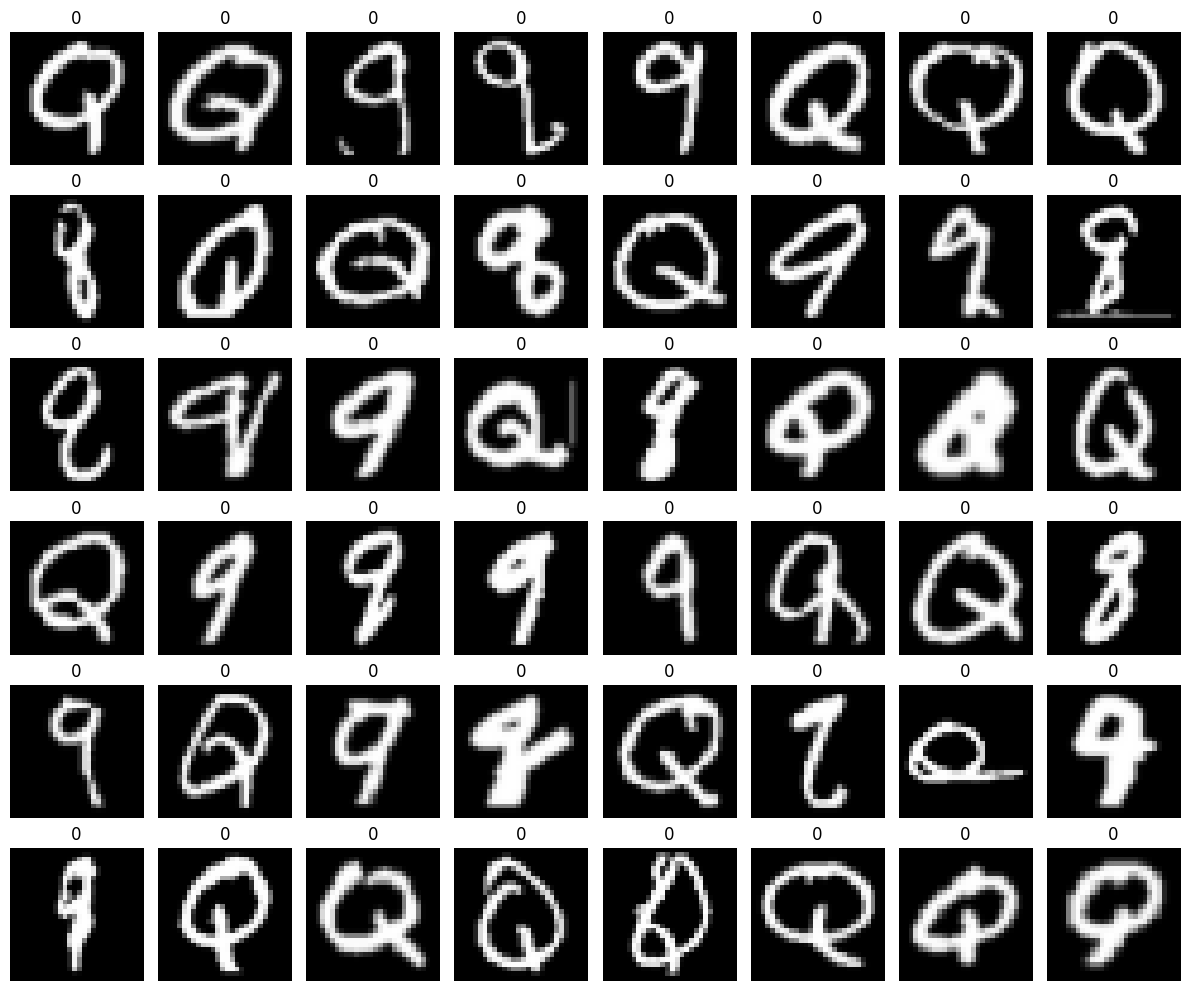

In [36]:
# Let's check images at the start - will all have label 0

plot_grid(x_binary, y_binary, n=0)

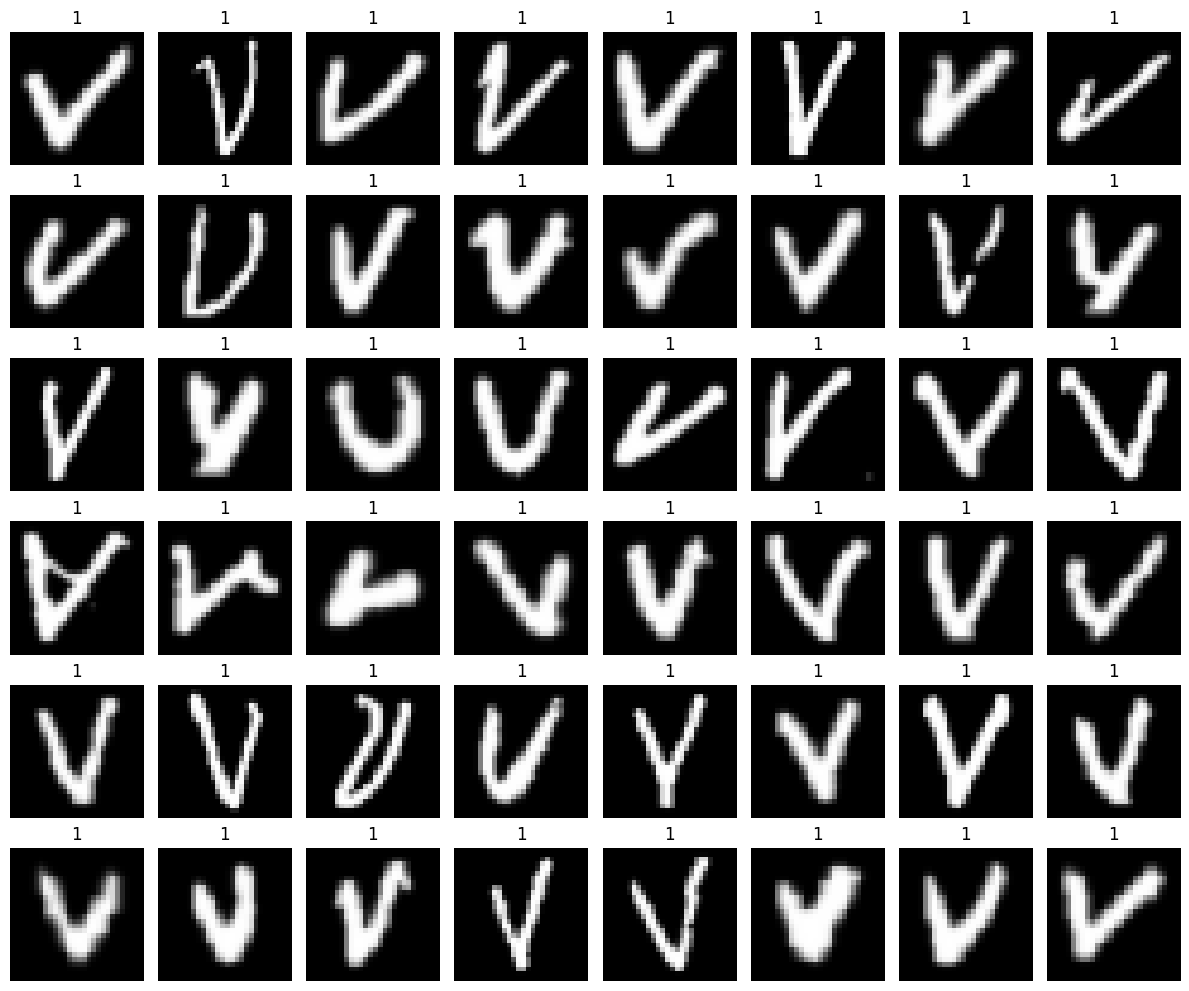

In [37]:
# Now check images after 3300 - will all have label 1

plot_grid(x_binary, y_binary, n=3300)

In [38]:
# Flatten images for neural network input (28x28 -> 784 features)
X_letters = x_binary.reshape(x_binary.shape[0], -1)
y_letters = y_binary

print(f"\nFlattened data shape: {X_letters.shape}")
print(f"Number of input features: {X_letters.shape[1]} (28x28 = 784)")
print(f"Total samples: {len(y_letters)}")


Flattened data shape: (6600, 784)
Number of input features: 784 (28x28 = 784)
Total samples: 6600


In [39]:
# Split into train/val/test sets (70/15/15)
np.random.seed(42)
indices_letters = np.random.permutation(len(X_letters))
X_letters_shuffled = X_letters[indices_letters]
y_letters_shuffled = y_letters[indices_letters]

train_letters, val_letters, test_letters = np.split(X_letters_shuffled, [int(.7*len(X_letters)), int(.85*len(X_letters))])
train_labels, val_labels, test_labels = np.split(y_letters_shuffled, [int(.7*len(y_letters)), int(.85*len(y_letters))])

print(f"Training set: {len(train_letters)} samples")
print(f"Validation set: {len(val_letters)} samples")
print(f"Test set: {len(test_letters)} samples")

Training set: 4620 samples
Validation set: 990 samples
Test set: 990 samples


In [40]:
# Train the neural network on EMNIST letters
# Using more hidden nodes since we have 784 input features (28x28 images)
n_hidden = 50  # Larger than Task 3 due to higher dimensional input

W1_letters, b1_letters, W2_letters, b2_letters, losses_letters, val_accs_letters, iters_letters = shallow_neural_network(
    train_letters, train_labels, val_letters, val_labels,
    n_hidden_nodes=n_hidden,
    learning_rate=0.1,
    batch_size=100,
    threshold=1e-4,
    max_iter=5000
)

Iteration 100: Avg Loss = 0.7514, Val Accuracy = 0.5071
Iteration 200: Avg Loss = 0.4205, Val Accuracy = 0.9414
Iteration 300: Avg Loss = 0.1450, Val Accuracy = 0.9535
Iteration 400: Avg Loss = 0.0680, Val Accuracy = 0.9576
Iteration 500: Avg Loss = 0.2038, Val Accuracy = 0.9677
Iteration 600: Avg Loss = 0.0421, Val Accuracy = 0.9758
Iteration 700: Avg Loss = 0.0187, Val Accuracy = 0.9727
Iteration 800: Avg Loss = 0.0746, Val Accuracy = 0.9657
Iteration 900: Avg Loss = 0.0248, Val Accuracy = 0.9717
Iteration 1000: Avg Loss = 0.0744, Val Accuracy = 0.9727
Iteration 1100: Avg Loss = 0.0995, Val Accuracy = 0.9737
Iteration 1200: Avg Loss = 0.0856, Val Accuracy = 0.9778
Iteration 1300: Avg Loss = 0.0397, Val Accuracy = 0.9778
Iteration 1400: Avg Loss = 0.0095, Val Accuracy = 0.9798
Iteration 1500: Avg Loss = 0.0440, Val Accuracy = 0.9515
Iteration 1600: Avg Loss = 0.0430, Val Accuracy = 0.9758
Iteration 1700: Avg Loss = 0.0079, Val Accuracy = 0.9747
Iteration 1800: Avg Loss = 0.0496, Val A

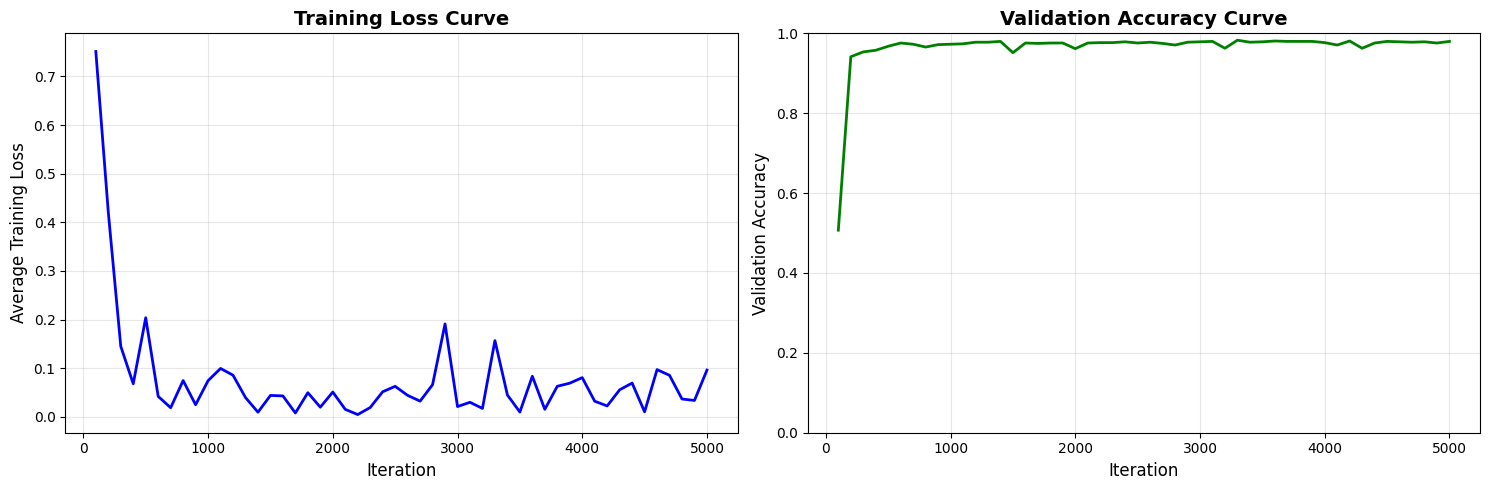

In [41]:
# Plot training curves
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Training Loss
axes[0].plot(iters_letters, losses_letters, 'b-', linewidth=2)
axes[0].set_xlabel('Iteration', fontsize=12)
axes[0].set_ylabel('Average Training Loss', fontsize=12)
axes[0].set_title('Training Loss Curve', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Validation Accuracy
axes[1].plot(iters_letters, val_accs_letters, 'g-', linewidth=2)
axes[1].set_xlabel('Iteration', fontsize=12)
axes[1].set_ylabel('Validation Accuracy', fontsize=12)
axes[1].set_title('Validation Accuracy Curve', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()
plt.close(fig)

In [42]:
# Evaluate on all sets
y_train_pred_letters, y_train_prob_letters = predict_nn(train_letters, W1_letters, b1_letters, W2_letters, b2_letters)
y_val_pred_letters, y_val_prob_letters = predict_nn(val_letters, W1_letters, b1_letters, W2_letters, b2_letters)
y_test_pred_letters, y_test_prob_letters = predict_nn(test_letters, W1_letters, b1_letters, W2_letters, b2_letters)

print(f"\nAccuracy Results:")
print(f"Training Accuracy:   {accuracy(train_labels, y_train_pred_letters):.4f}")
print(f"Validation Accuracy: {accuracy(val_labels, y_val_pred_letters):.4f}")
print(f"Test Accuracy:       {accuracy(test_labels, y_test_pred_letters):.4f}")


Accuracy Results:
Training Accuracy:   0.9855
Validation Accuracy: 0.9798
Test Accuracy:       0.9828


This was an interesting and fundamental task that was good to see how robust my model was. There was a fair bit of hyperparameter tuning required to get the model to work well, but the most important one was the number of hidden nodes, which makes sense due to this being a higher-dimensional data. But at the end I ended up getting a ~98% test accuracy. Just for fun, I even tested my model out on other, more difficult combinations such as M,N or O,Q and I wanted to check whether the accuracies fell (because they are difficult to differentiate even for a human so I would expect the model accuracy to fall as well, however lightly) and happy to confirm, it did! 92-94% for either of them which was promising the the model isn't overfitting.